<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/7%EC%A3%BC%EC%B0%A8/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CIFAR 10 3개 분류

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
import matplotlib.pyplot as plt

# 데이터 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"  - 원본 학습 데이터: {x_train.shape}")
print(f"  - 원본 테스트 데이터: {x_test.shape}\n")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
  - 원본 학습 데이터: (50000, 32, 32, 3)
  - 원본 테스트 데이터: (10000, 32, 32, 3)



In [2]:
# 전체 클래스 이름 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 사용할 클래스 선택
selected_classes = ['cat', 'dog', 'horse']
selected_idx = [class_names.index(c) for c in selected_classes]

In [3]:
# 해당 클래스만 필터링
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

print(f"선택된 클래스: {selected_classes}")
print(f"  - 필터링 후 학습 샘플 수: {len(x_train)}")
print(f"  - 필터링 후 테스트 샘플 수: {len(x_test)}\n")

선택된 클래스: ['cat', 'dog', 'horse']
  - 필터링 후 학습 샘플 수: 15000
  - 필터링 후 테스트 샘플 수: 3000



In [4]:
# 라벨 매핑
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)] for y in y_train])
y_test = np.array([label_map[int(y)] for y in y_test])

# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0


/tmp/ipython-input-4231696362.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-4231696362.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)] for y in y_test])


In [5]:
# CNN 모델 구성

model = models.Sequential([
    # 입력 형태: 32x32 크기의 3채널(컬러) 이미지
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),

    # 특징을 더 잘 학습하기 위해 Conv-Pool 블록 추가
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),

    # 분류를 위한 DNN 부분 (Classifier)
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # 과적합 방지를 위해 Dropout 비율을 0.5로 설정

    # 최종 출력층: 3개의 클래스에 대한 확률을 출력
    layers.Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,339 (4.36 MB)

 Trainable params: 1,142,339 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 컴파일 및 학습
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\n[INFO] 모델 학습을 시작합니다...")

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=2)


[INFO] 모델 학습을 시작합니다...
Epoch 1/10
235/235 - 10s - 42ms/step - accuracy: 0.5509 - loss: 0.8975 - val_accuracy: 0.6643 - val_loss: 0.7525
Epoch 2/10
235/235 - 1s - 5ms/step - accuracy: 0.6693 - loss: 0.7227 - val_accuracy: 0.6973 - val_loss: 0.6909
Epoch 3/10
235/235 - 3s - 11ms/step - accuracy: 0.7168 - loss: 0.6406 - val_accuracy: 0.7187 - val_loss: 0.6215
Epoch 4/10
235/235 - 1s - 5ms/step - accuracy: 0.7482 - loss: 0.5847 - val_accuracy: 0.7547 - val_loss: 0.5690
Epoch 5/10
235/235 - 1s - 5ms/step - accuracy: 0.7741 - loss: 0.5350 - val_accuracy: 0.7640 - val_loss: 0.5581
Epoch 6/10
235/235 - 1s - 5ms/step - accuracy: 0.7972 - loss: 0.4803 - val_accuracy: 0.7730 - val_loss: 0.5378
Epoch 7/10
235/235 - 1s - 5ms/step - accuracy: 0.8215 - loss: 0.4329 - val_accuracy: 0.7823 - val_loss: 0.5212
Epoch 8/10
235/235 - 1s - 5ms/step - accuracy: 0.8390 - loss: 0.3906 - val_accuracy: 0.7790 - val_loss: 0.5607
Epoch 9/10
235/235 - 1s - 5ms/step - accuracy: 0.8555 - loss: 0.3498 - val_accuracy: 

In [7]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ 최종 테스트 정확도: {test_acc:.4f}")

94/94 - 1s - 14ms/step - accuracy: 0.7780 - loss: 0.5840

✅ 최종 테스트 정확도: 0.7780


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


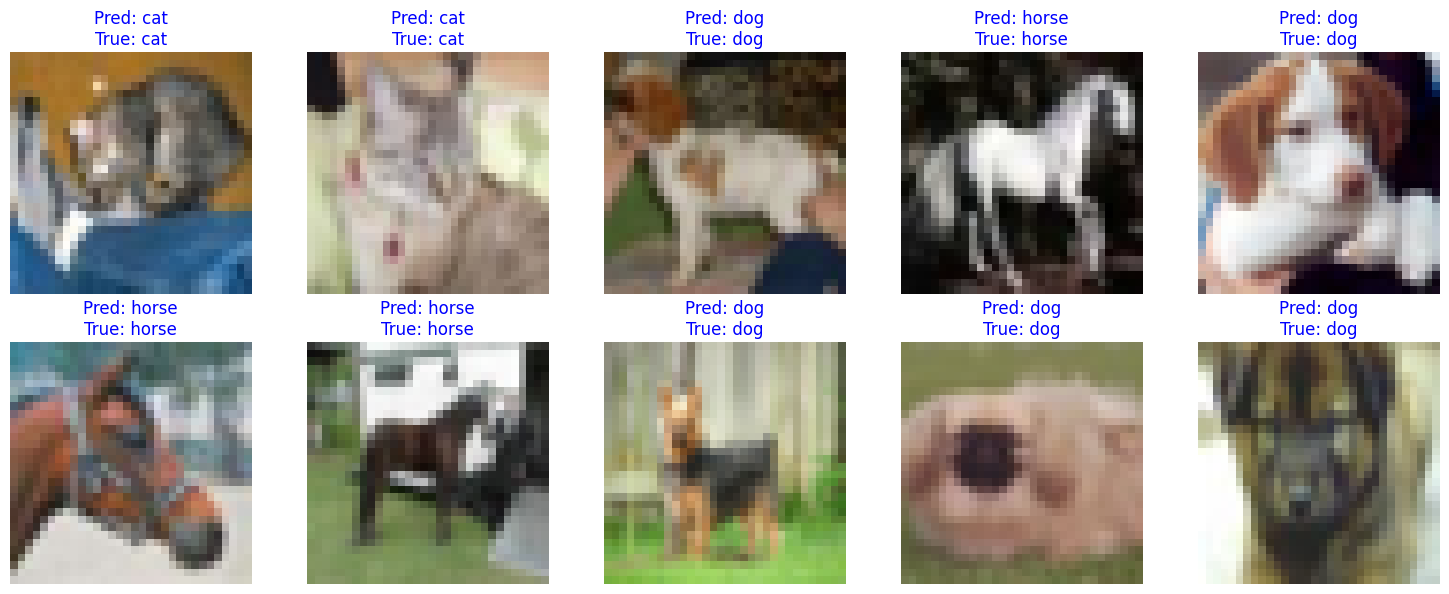

In [8]:
# 시각화
predictions = model.predict(x_test[:10])

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])

    predicted_idx = np.argmax(predictions[i])
    true_idx = y_test[i]

    pred_name = selected_classes[predicted_idx]
    true_name = selected_classes[true_idx]

    # 예측이 맞으면 파란색, 틀리면 빨간색으로 표시
    color = 'blue' if pred_name == true_name else 'red'

    plt.title(f"Pred: {pred_name}\nTrue: {true_name}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()